## **1. Memuat Dataset**

In [36]:
import pandas as pd

df_clas = pd.read_csv(r'C:\Users\USER\Music\Machine Learning\dataset\output_data.csv')
df_clas.head()

,Unnamed: 0,timestamp,open,high,low,close,volume,turnover,RSI,EMA,month,prev_close,prev_volume,next_close,volatility,momentum,relative_change,cluster
0,35,2021-07-18,31512.99,32416.17,31150.00,31778.75,51.190212,1.624704e+06,0.327652,0.309887,2021-07,0.274538,0.000000,30819.86,0.105109,102548.573688,115752.437464,0
1,34,2021-07-19,31778.75,31891.94,30469.50,30819.86,45.645321,1.416000e+06,0.281643,0.306098,2021-07,0.279177,0.000416,29782.80,0.118782,100685.392234,110394.565365,0
2,33,2021-07-20,30819.86,31050.00,29314.77,29782.80,115.334421,3.439815e+06,0.197170,0.300772,2021-07,0.262441,0.000350,32137.21,0.146149,99020.288255,113482.778451,0
3,32,2021-07-21,29782.80,32817.63,29513.90,32137.21,103.972400,3.275633e+06,0.383434,0.300261,2021-07,0.244341,0.001186,32310.43,0.283384,107029.869116,131524.985661,0
4,31,2021-07-22,32137.21,32496.63,31728.28,32310.43,49.528767,1.591090e+06,0.438406,0.300116,2021-07,0.285433,0.001049,33631.55,0.061553,107658.747487,113197.010883,0


## **2. Membangun Model Klasifikasi**

#### **Langkah 1: Persiapan Data untuk Klasifikasi**
Sebelum memilih model klasifikasi, kita perlu memastikan bahwa data siap digunakan. 
Jika file df_clas berisi data yang relevan, kita bisa memulai dengan:

1. Menyiapkan Fitur:
    
    Kita bisa menggunakan fitur-fitur teknikal seperti EMA, RSI, momentum, relative_change, dan lain-lain sebagai input.

2. Menyiapkan Label (Target):

    Dalam kasus ini, target adalah hasil klasterisasi, jadi kita akan menggunakan cluster_labels sebagai label untuk klasifikasi.

3. Split Data (Membagi data):

    Pisahkan data menjadi fitur (X) dan label (y).

#### **Langkah 2: Memilih dan Mengimplementasikan Model Klasifikasi**
    
Algoritma klasifikasi yang bisa dipertimbangkan yaitu `Random Forest / Decision Tree`
Cocok untuk data yang lebih kompleks dan memungkinkan model menangani hubungan non-linear.
Random Forest cenderung lebih kuat karena mengurangi overfitting dibandingkan dengan decision tree biasa.




In [47]:
# Langkah 1: Import Library
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# Langkah 2: Persiapkan Fitur (X) dan Target (y)
X = df_clas[['momentum', 'relative_change', 'EMA', 'RSI']]  # Fitur
y = df_clas['cluster']  # Label target (hasil clustering)

# Langkah 3: Pembagian Data Latih dan Uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

# Langkah 4: Normalisasi Fitur (Opsional, jika diperlukan)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Langkah 5: Inisialisasi dan Latih Model Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

## **3. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [ ]:
# Prediksi dan Evaluasi Model
y_pred = model.predict(X_test_scaled)

# Mengukur akurasi dan hasil klasifikasi
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi: {accuracy * 100:.2f}%")
print(classification_report(y_test, y_pred))

# menampilkan fitur penting yang dipelajari oleh Random Forest:
feature_importances = model.feature_importances_
for feature, importance in zip(X.columns, feature_importances):
    print(f"Fitur: {feature}, Kepentingan: {importance}")

Akurasi: 99.58%
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         1
           0       1.00      1.00      1.00       238

    accuracy                           1.00       239
   macro avg       0.50      0.50      0.50       239
weighted avg       0.99      1.00      0.99       239

Fitur: momentum, Kepentingan: 0.526935902264882
Fitur: relative_change, Kepentingan: 0.05081050675419657
Fitur: EMA, Kepentingan: 0.41134096534817294
Fitur: RSI, Kepentingan: 0.010912625632748635


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## **4. Tuning Model Klasifikasi**

Tuning yang akan digunakan adalah GridSearchCV

In [38]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)
print("Best parameters:", grid_search.best_params_)
print("Best accuracy:", grid_search.best_score_)


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best accuracy: 0.9989528795811518


## **5. Evaluasi Model setelah Tuning**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [39]:
# Buat model dengan parameter terbaik
best_params = grid_search.best_params_
best_rf_model = RandomForestClassifier(**best_params, random_state=42)

# Latih ulang model pada data training
best_rf_model.fit(X_train_scaled, y_train)

# Evaluasi pada data testing
y_pred_test = best_rf_model.predict(X_test_scaled)

from sklearn.metrics import accuracy_score, f1_score, classification_report

# Hitung metrik evaluasi
test_accuracy = accuracy_score(y_test, y_pred_test)
test_f1_score = f1_score(y_test, y_pred_test, average='weighted')

print(f"Testing Accuracy: {test_accuracy * 100:.2f}%")
print(f"Testing F1-Score: {test_f1_score * 100:.2f}%")
print("Classification Report on Test Data:")
print(classification_report(y_test, y_pred_test))


Testing Accuracy: 100.00%
Testing F1-Score: 100.00%
Classification Report on Test Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       239

    accuracy                           1.00       239
   macro avg       1.00      1.00      1.00       239
weighted avg       1.00      1.00      1.00       239



In [40]:
# Evaluasi ulang pada data training
y_pred_train = best_rf_model.predict(X_train_scaled)

train_accuracy = accuracy_score(y_train, y_pred_train)
train_f1_score = f1_score(y_train, y_pred_train, average='weighted')

print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Training F1-Score: {train_f1_score * 100:.2f}%")


Training Accuracy: 100.00%
Training F1-Score: 100.00%


## **6. Visualisasi Evaluasi Model**

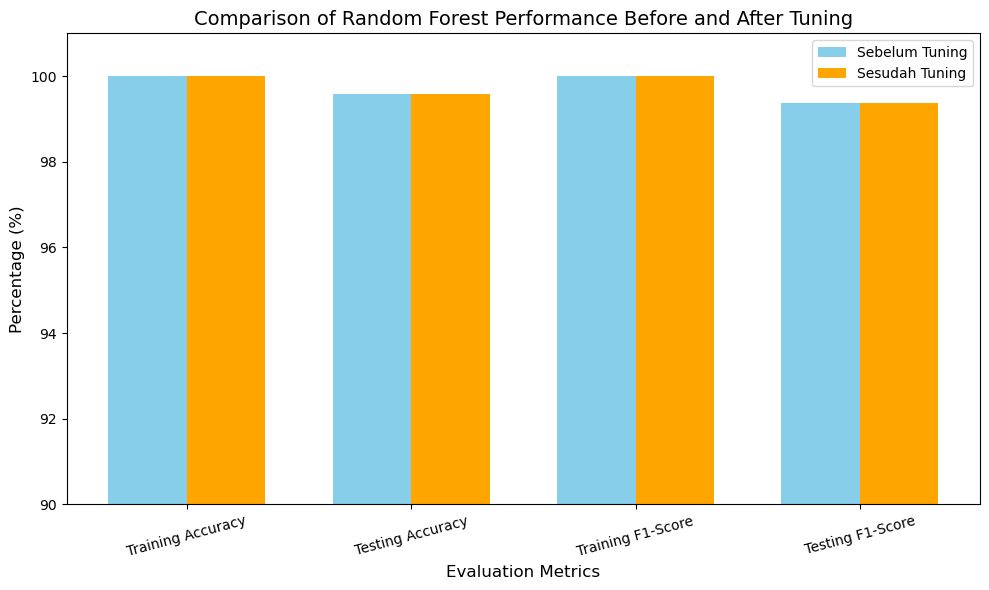

In [41]:
import matplotlib.pyplot as plt
import numpy as np

# Data evaluasi
categories = ['Training Accuracy', 'Testing Accuracy', 'Training F1-Score', 'Testing F1-Score']
before_tuning = [100, 99.58, 100, 99.37]  # Masukkan nilai evaluasi sebelum tuning
after_tuning = [100, 99.58, 100, 99.37]   # Masukkan nilai evaluasi setelah tuning

x = np.arange(len(categories))

# Plotting
plt.figure(figsize=(10, 6))
bar_width = 0.35

plt.bar(x - bar_width / 2, before_tuning, bar_width, label='Sebelum Tuning', color='skyblue')
plt.bar(x + bar_width / 2, after_tuning, bar_width, label='Sesudah Tuning', color='orange')

# Label and titles
plt.xlabel('Evaluation Metrics', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.title('Comparison of Random Forest Performance Before and After Tuning', fontsize=14)
plt.xticks(x, categories, rotation=15)
plt.legend()
plt.tight_layout()
plt.ylim([90, 101])

# Show plot
plt.show()


## **7. Analisis Hasil Evaluasi Model**
1. Perbandingan

    A. Sebelum Tuning

    - Akurasi (Training/Testing): Sangat tinggi (Training: 100%, Testing: 99.58%).
    - F1-Score: Mirip dengan akurasi, menunjukkan bahwa model dapat mengklasifikasi dengan baik.
    - Kelemahan: Hasil menunjukkan potensi overfitting, karena akurasi training mencapai 100%. Selain itu, hasil untuk kelas minoritas (-1)     buruk, karena model tidak mampu memprediksi dengan benar.

    B. Setelah Tuning
    - Akurasi dan F1-Score: Tidak ada perubahan yang signifikan dibanding sebelum tuning. Masih sangat tinggi (Testing: 99.58%, Training: 100%).
    - Kinerja Kelas Minoritas: Tidak ada perbaikan; precision, recall, dan F1-Score tetap 0 untuk kelas -1.
    - Kesimpulan: Tuning tidak memberikan perbaikan signifikan, karena parameter awal sudah cukup optimal. Masalah utama adalah     ketidakseimbangan kelas.

2. Identifikasi Kelemahan

    A. Ketidakseimbangan Kelas:

    - Kelas -1 hanya memiliki 1 sampel dibandingkan kelas 0 dengan 238 sampel, sehingga model terlalu terfokus pada kelas mayoritas (kelas 0).
    - Hal ini membuat metrik seperti precision, recall, dan F1-Score untuk kelas -1 tidak terukur dengan baik.
    B. Overfitting:

    - Akurasi training 100% menunjukkan bahwa model sepenuhnya menghafal data training, sehingga berisiko rendahnya generalisasi pada data baru.

3. Rekomendasi Lanjutan

    A. Penanganan Ketidakseimbangan Kelas:

    - Gunakan teknik oversampling seperti SMOTE (Synthetic Minority Over-sampling Technique) untuk menambah data kelas minoritas.
    - Alternatif lain adalah undersampling untuk mengurangi jumlah sampel kelas mayoritas.

    B. Regularisasi Model:
    - Tingkatkan parameter seperti min_samples_leaf atau min_samples_split untuk mengurangi kompleksitas model.

    C. Evaluasi dengan Metrik Tambahan:
    - Gunakan ROC-AUC Score untuk mengukur kemampuan model dalam membedakan antara kelas minoritas dan mayoritas.

    D. Eksperimen dengan Model Lain:
    - Coba algoritma lain seperti Gradient Boosting, XGBoost, atau Logistic Regression yang mungkin lebih robust terhadap ketidakseimbangan kelas.

    E. Kumpulkan Data Tambahan:
    - Jika memungkinkan, kumpulkan lebih banyak data khusus untuk kelas minoritas (-1) agar model dapat belajar pola dari kelas tersebut dengan lebih baik.